<a href="https://colab.research.google.com/github/MiharyRamanana/Enthusiasm-Karaoke-Deep-Learning/blob/main/CNN_Enthu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Karaoke machines can evaluate singing skill. However, it only
considers the pitch accuracy of the singer. Singing enthusiasm
evaluation refers to the process of identifying and measuring
the level of enthusiasm or passion in a person's singing
performance. Emotion recognition through deep learning is an
important area of research, playing a crucial role in the human
computer interaction domain. The emotions commonly studied
are sad, happy, angry, calm, fearful, neutral, disgust, sadness,
fear/anxiety, boredom, excited, frustrated, and surprised. In this
research, we use deep learning to evaluate enthusiasm.

#Part 1

##Import

In [ ]:
!pip install audiomentations

In [ ]:
import glob
import fnmatch
import librosa
import os

from IPython.display import Audio
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

## Dataset creation

We use the audio dataset from the Ito-Nose Lab of the Graduate
School of Engineering of Tohoku University. The dataset
contains 720 samples between 1 and 9 seconds, which are 360
stimuli sung with enthusiasm then without.

In [ ]:
import glob
import fnmatch
import librosa
import os

search = '/content/drive/MyDrive/tohoku jype/CNN enthu/dataset/*.wav'

dataset_audio = []
dataset_files = []
for file in glob.glob(search, recursive=True):
  x, sr = librosa.load(file)
  dataset_files.append(os.path.basename(file))
  dataset_audio.append(x)





In [ ]:
from IPython.display import Audio
import numpy as np

In [ ]:
import pandas as pd

metadata_path = '/content/drive/MyDrive/tohoku jype/CNN enthu/dataset/Evaluation.txt'
cols = ["filename", "enthusiasm"]
df = pd.read_csv(metadata_path, sep=" ", header=None, names=cols)

## data exploration


In [ ]:
df

,filename,enthusiasm
0,l_f01_elly_h1_e1_nm30.wav,1.000000
1,l_f01_elly_h1_e2_nm30.wav,0.878788
2,l_f01_elly_h1_e3_nm30.wav,1.484848
3,l_f01_elly_h1_e4_nm30.wav,1.393939
4,l_f01_elly_n1_e1_nm30.wav,0.696970
...,...,...
475,m11fn1_4.wav,0.666667
476,m11fn2_1.wav,0.400000
477,m11fn2_2.wav,1.066667
478,m11fn2_3.wav,1.000000


In [ ]:
df.describe()

,enthusiasm
count,480.000000
mean,1.016580
std,0.558281
min,0.000000
25%,0.566667
50%,1.000000
75%,1.500000
max,2.000000


**Data Explanation**

The file Evaluation.txt contains the result of subjective evaluation, where 0 means "not enthusiastic" and 2 means "enthusiastic".

Naming convention

l_f01_elly_h1_e1_nm30.wav

l_:	Reserved

f01:	Singer ID and song ID (a singer sang a unique song)

h:	n=normal h=enthusiastic

1:	Take number

e1:	Number of part in a song. 4 parts/song

nm30:	Reserved

In [ ]:
dataset_files[0]

'm01fh1_1.wav'

In [ ]:
df['filename'][0]

'l_f01_elly_h1_e1_nm30.wav'

In [ ]:
X = []
for k in range(len(df)):
  i=0
  while dataset_files[i] != df['filename'][k]:
    i += 1
  X.append([dataset_files[i],dataset_audio[i]])

In [ ]:
X[0]

['l_f01_elly_h1_e1_nm30.wav',
 array([-0.00447431, -0.00627946, -0.00549353, ..., -0.00611734,
        -0.0069791 , -0.0048384 ], dtype=float32)]

In [ ]:
print(X[10][0])
display(Audio(X[10][1], rate=sr))

l_f02_elly_h1_e3_nm30.wav


In [ ]:
df_enthu = df[df['enthusiasm'] >= 1.5]

In [ ]:
df_enthu.iloc[:20]

,filename,enthusiasm
18,l_f03_elly_h1_e3_nm30.wav,1.666667
19,l_f03_elly_h1_e4_nm30.wav,1.818182
21,l_f03_elly_n1_e2_nm30.wav,1.545455
40,l_m02_elly_h1_e1_nm30.wav,1.727273
48,l_m03_elly_h1_e1_nm30.wav,1.818182
49,l_m03_elly_h1_e2_nm30.wav,1.939394
50,l_m03_elly_h1_e3_nm30.wav,1.787879
51,l_m03_elly_h1_e4_nm30.wav,1.909091
52,l_m03_elly_n1_e1_nm30.wav,1.833333
53,l_m03_elly_n1_e2_nm30.wav,1.633333


In [ ]:
print(X[51][0])
display(Audio(X[51][1], rate=sr))

l_m03_elly_h1_e4_nm30.wav


In [ ]:
df.loc[df.enthusiasm == 2]

,filename,enthusiasm
200,l_m03_elly_h1_kore.wav,2.0
387,m06fh1_4.wav,2.0
390,m06fh2_3.wav,2.0
391,m06fh2_4.wav,2.0
434,m09fh1_3.wav,2.0
435,m09fh1_4.wav,2.0
437,m09fh2_2.wav,2.0
438,m09fh2_3.wav,2.0
439,m09fh2_4.wav,2.0


In [ ]:
print(X[200][0])
display(Audio(X[200][1], rate=sr))

l_m03_elly_h1_kore.wav


In [ ]:
data = df.copy()

In [ ]:
data["duration"] = [len(X[i][1]) / sr for i in range(len(X)) ]

In [ ]:
data["sample"] = [len(X[i][1]) for i in range(len(X))]

In [ ]:
data.head()

,filename,enthusiasm,duration,sample
0,l_f01_elly_h1_e1_nm30.wav,1.000000,2.095011,46195
1,l_f01_elly_h1_e2_nm30.wav,0.878788,2.175011,47959
2,l_f01_elly_h1_e3_nm30.wav,1.484848,2.075011,45754
3,l_f01_elly_h1_e4_nm30.wav,1.393939,2.055011,45313
4,l_f01_elly_n1_e1_nm30.wav,0.696970,2.135011,47077


In [ ]:
data.describe()

,enthusiasm,duration,sample
count,480.000000,480.000000,480.000000
mean,1.016580,4.219075,93030.612500
std,0.558281,1.968373,43402.628422
min,0.000000,1.647982,36338.000000
25%,0.566667,2.345839,51725.750000
50%,1.000000,3.890771,85791.500000
75%,1.500000,5.520295,121722.500000
max,2.000000,9.282857,204687.000000


In [ ]:
data.iloc[data.duration.idxmax()]

,207
filename,l_m03_elly_n1_wara.wav
enthusiasm,1.666667
duration,9.282857
sample,204687


In [ ]:
print(X[207][0])
display(Audio(X[207][1], rate=sr))

l_m03_elly_n1_wara.wav


In [ ]:
print(X[203][0])
display(Audio(X[203][1], rate=sr))

l_m03_elly_h1_wara.wav


In [ ]:
data.iloc[data.duration.idxmin()]

,453
filename,m10fh2_2.wav
enthusiasm,0.733333
duration,1.647982
sample,36338


In [ ]:
print(X[453][0])
display(Audio(X[453][1], rate=sr))

m10fh2_2.wav


In [ ]:
print(X[454][0])
display(Audio(X[454][1], rate=sr))

m10fh2_3.wav


In [ ]:

X_audio = []
X_files = []
for k in range(len(df)):
  i = 0
  while dataset_files[i] != df['filename'][k]:
    i += 1
  X_audio.append(dataset_audio[i])
  X_files.append(dataset_files[i])


In [ ]:
#X_files

Now the dataset is well sorted.

In [ ]:
Y = df['enthusiasm']

In [ ]:
Y

,enthusiasm
0,1.000000
1,0.878788
2,1.484848
3,1.393939
4,0.696970
...,...
475,0.666667
476,0.400000
477,1.066667
478,1.000000


In [ ]:
len(max(X_audio, key=len))

204687

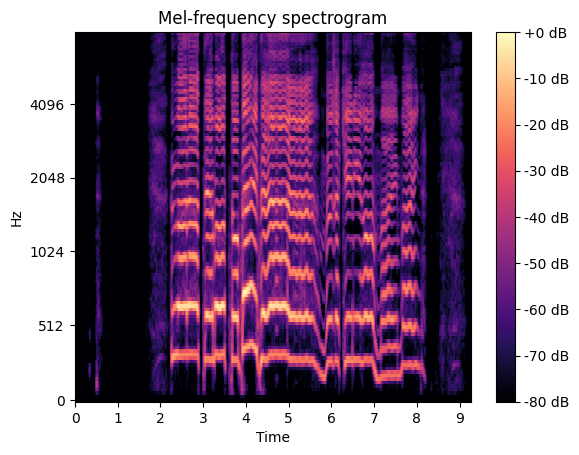

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S = librosa.feature.melspectrogram(y=X_audio[207], sr=sr, n_mels=128,
                                    fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
display(Audio(X_audio[207], rate=sr))

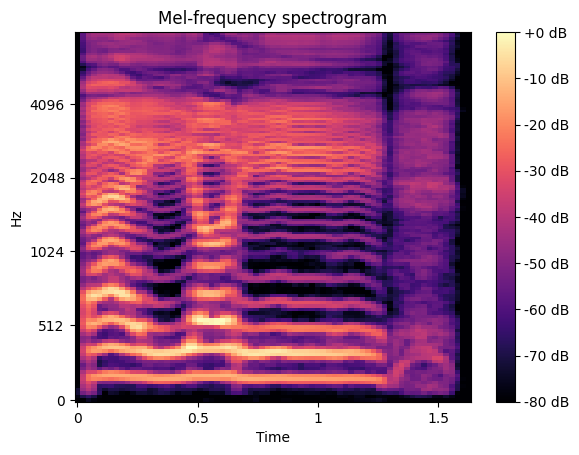

In [ ]:
fig, ax = plt.subplots()
S = librosa.feature.melspectrogram(y=X_audio[453], sr=sr, n_mels=128,
                                    fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
display(Audio(X_audio[453], rate=sr))

In [ ]:
img.get_array().shape

(128, 71)

In [ ]:
S_dB.shape

(128, 71)

## Data Augmentation

In [ ]:
!pip install audiomentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 21.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


audiomentations is a library for audio data augmentation. We initially have a dataset of size 480, which is low. So we want to increase this size to help us generalize our model.

We define different type of audio augmentations.

In [ ]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift, Gain, PolarityInversion

augment1 = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=1.0)
])

augment2 = Compose([
    PitchShift(min_semitones=-5, max_semitones=5, p=1.0)
])

augment3 = Compose([
    TimeStretch(min_rate=0.8, max_rate=1.25, leave_length_unchanged=True, p=1.0)
])

augment4 = Compose([
    Gain(min_gain_db=-5, max_gain_db=5, p=1.0)
])

augment5 = Compose([
    PolarityInversion(p=1.0)
])

augment6 = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=1.0),
    PitchShift(min_semitones=-4, max_semitones=4, p=1.0),
])

augment7 = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=1.0),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=1.0),
    PitchShift(min_semitones=-4, max_semitones=4, p=1.0),
    Shift(p=0.5),
])

In [ ]:
def audio_augmentation(dataset, augmentation):
  dataset_augmented = []
  for k in range(len(dataset)):
    dataset_augmented.append(augmentation(samples=dataset[k], sample_rate=sr))
  return dataset_augmented

In [ ]:
X_augment1 = audio_augmentation(X_audio, augment1)
X_augment2 = audio_augmentation(X_audio, augment2)
X_augment3 = audio_augmentation(X_audio, augment3)
X_augment4 = audio_augmentation(X_audio, augment4)
X_augment5 = audio_augmentation(X_audio, augment5)
X_augment6 = audio_augmentation(X_audio, augment6)
X_augment7 = audio_augmentation(X_audio, augment7)

In [ ]:
X_augmented = X_audio + X_augment1 + X_augment2 + X_augment3 + X_augment4 + X_augment5 + X_augment6 + X_augment7

In [ ]:
Y_augmented = np.concatenate((Y, Y, Y, Y, Y, Y, Y, Y))

##Resizing the audio length

The length of each audio file is reduced or augmented to the length of 5 seconds.

In [ ]:
"""
def resizeLength(dataset):
  minLength = len(min(dataset, key=len))
  data_resized = dataset
  for k in range(len(dataset)):
    data_resized[k] = dataset[k][:minLength]
  return data_resized
"""

'\ndef resizeLength(dataset):\n  minLength = len(min(dataset, key=len))\n  data_resized = dataset\n  for k in range(len(dataset)):\n    data_resized[k] = dataset[k][:minLength]\n  return data_resized\n'

In [ ]:
def resizeLength(dataset):
  #maxLength = len(max(dataset, key=len))
  length = sr * 5 # 5 seconds
  data_resized = []
  for k in range(len(dataset)):
    if len(dataset[k]) < length:
      padded_element = np.pad(dataset[k], (0, length - len(dataset[k])))
      data_resized.append(padded_element)
    else:
      truncated_element = dataset[k][:length]
      data_resized.append(truncated_element)
  return np.array(data_resized)

In [ ]:
X_augmented_resize = resizeLength(X_augmented)

In [ ]:
X_augmented_resize.shape

(3840, 110250)

##Save data

In [ ]:
np.savez('/content/drive/MyDrive/tohoku jype/CNN enthu/dataset/Enthusiasm_data_augmented_resized', inputs=X_augmented_resize, targets=Y_augmented)

##Load data

In [ ]:
data = np.load('/content/drive/MyDrive/tohoku jype/CNN enthu/dataset/Enthusiasm_data_augmented_resized.npz')

In [ ]:
X_augmented_resize = data['inputs']
Y_augmented = data['targets']

In [ ]:
#sr = 22050

##Mel-Spectrogram

We then extract the Mel-scaled spectrogram of the samples.
Mel-scaled spectrograms are commonly used to identify and
track the timbre fluctuations of a sound file.

In [ ]:
import numpy as np

def melspectrogram(dataset, sr):
  list_mel = []
  for k in range(len(dataset)):
    S = librosa.feature.melspectrogram(y = dataset[k], sr = sr, n_fft=2048, hop_length=512 )
    #S_dB = librosa.power_to_db(S, ref=np.max)
    S_dB = librosa.power_to_db(S, ref=1.0)
    list_mel.append(S_dB.reshape((128, 216, 1)))#(S_dB.reshape((128, 71, 1)))
  return list_mel

In [ ]:
sr

22050

In [ ]:
X_melspectrogram = melspectrogram(X_augmented_resize, sr)

In [ ]:
X = np.array(X_melspectrogram)

In [ ]:
X.shape

(3840, 128, 216, 1)

In [ ]:
X.shape

(3840, 128, 216)

In [ ]:
Y_augmented.shape

(3840,)

##Save Spectrogram

In [ ]:
np.savez('/content/drive/MyDrive/tohoku jype/CNN enthu/dataset/Enthusiasm_data_spectrogram', inputs=X, targets=Y_augmented)

##Load Spectrogram

In [ ]:
data = np.load('/content/drive/MyDrive/tohoku jype/CNN enthu/dataset/Enthusiasm_data_spectrogram.npz')

In [ ]:
X = data['inputs']
Y = data['targets']

##Normalizing the target values

In [ ]:
Y.max()

2.0

In [ ]:
Y = (Y - Y.min()) / (Y.max() - Y.min())

In [ ]:
Y

array([0.5      , 0.439394 , 0.742424 , ..., 0.5333335, 0.5      ,
       0.4333335])

##Split into training sets and test set

We have the spectrograms of same size. We split the dataset into training and test sets.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state=42, shuffle=True)

In [ ]:
X_train.shape

(2304, 128, 216, 1)

In [ ]:
#X_train.reshape(X_train.shape[0], 128, 71, 1)
#X_test.reshape(X_test.shape[0], 128, 71, 1)
#input_shape = (128, 71, 1)

In [ ]:
X_train[0].shape

(128, 216, 1)

In [ ]:
y_train.shape

(2304,)

In [ ]:
X_test = (X_test - X_train.min()) / (X_train.max() - X_train.min())
X_valid = (X_valid - X_train.min()) / (X_train.max() - X_train.min())
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())


In [ ]:
input_shape = (128, 216, 1)

##CNN Implementation

In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, InputLayer, MaxPooling2D, Flatten, BatchNormalization, Dropout

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(128, 3, activation = 'relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(256, 3, activation = 'relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(512, 3, activation = 'relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation="linear"))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 216, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 216, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 108, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 108, 128)        │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 108, 128)        │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 54, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 54, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 27, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 27, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 27, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 13, 512)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 13, 512)          │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 53248)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │     109,053,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 111,725,057 (426.20 MB)

 Trainable params: 111,721,857 (426.19 MB)

 Non-trainable params: 3,200 (12.50 KB)

In [ ]:
from keras import metrics
optimizer = keras.optimizers.SGD(learning_rate=0.5)
opt = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=[metrics.MeanSquaredError()])
callback = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0001, patience=20, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=32, epochs=100, callbacks=[callback])

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 29s 158ms/step - loss: 2.4325 - mean_squared_error: 2.4325 - val_loss: 0.0746 - val_mean_squared_error: 0.0746
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - loss: 0.5573 - mean_squared_error: 0.5573 - val_loss: 0.1200 - val_mean_squared_error: 0.1200
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - loss: 0.4605 - mean_squared_error: 0.4605 - val_loss: 0.1684 - val_mean_squared_error: 0.1684
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - loss: 0.3498 - mean_squared_error: 0.3498 - val_loss: 0.1980 - val_mean_squared_error: 0.1980
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - loss: 0.3312 - mean_squared_error: 0.3312 - val_loss: 0.1020 - val_mean_squared_error: 0.1020
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - loss: 0.2354 - mean_squared_error: 0.2354 - val_loss: 0.1014 - val_mean_squared_error: 0.1014
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - loss: 0.1997 - mean_squared_error: 0.1997 - val_l

Minimum validation loss: 0.011920967139303684


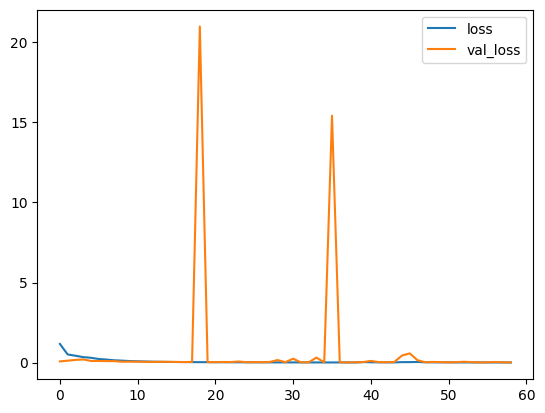

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
output = model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [ ]:
output[0:20]

array([[ 0.41326475],
       [ 0.62559485],
       [ 0.37352595],
       [ 0.6686848 ],
       [ 0.55528927],
       [ 0.55520463],
       [ 0.43210346],
       [ 0.32996988],
       [ 0.35045874],
       [ 0.19367968],
       [ 0.70356625],
       [ 0.83194387],
       [ 0.6431962 ],
       [ 0.08312649],
       [ 0.15394814],
       [ 0.2681887 ],
       [-0.05804364],
       [ 0.29183573],
       [ 0.042512  ],
       [ 0.38814738]], dtype=float32)

In [ ]:
y_test[0:20]

array([0.651515 , 0.5333335, 0.4444445, 0.722222 , 0.7333335, 0.6333335,
       0.3333335, 0.5      , 0.439394 , 0.2727275, 0.777778 , 1.       ,
       0.75     , 0.090909 , 0.2833335, 0.6      , 0.1666665, 0.3055555,
       0.0833335, 0.3939395])

In [ ]:
import matplotlib.pyplot as plt
np.squeeze(output)

array([ 4.13264751e-01,  6.25594854e-01,  3.73525947e-01,  6.68684781e-01,
        5.55289268e-01,  5.55204630e-01,  4.32103455e-01,  3.29969883e-01,
        3.50458741e-01,  1.93679675e-01,  7.03566253e-01,  8.31943870e-01,
        6.43196225e-01,  8.31264853e-02,  1.53948143e-01,  2.68188685e-01,
       -5.80436438e-02,  2.91835725e-01,  4.25119996e-02,  3.88147384e-01,
        1.42748073e-01,  4.95224833e-01,  5.51971018e-01,  8.34822178e-01,
        7.69083738e-01,  5.00936389e-01,  4.87575829e-02,  6.05141044e-01,
        5.79835117e-01,  3.34403366e-01, -1.51097625e-02,  5.85130394e-01,
        7.08888233e-01,  6.61017537e-01,  3.34409773e-01,  3.58588636e-01,
        5.28901577e-01,  1.35256320e-01,  1.53303504e-01,  5.49578190e-01,
        9.24463689e-01,  6.27900958e-01,  6.53394938e-01, -5.49256504e-02,
        3.41073096e-01, -4.26433384e-02,  5.33646286e-01,  2.85396993e-01,
        5.04300833e-01,  1.00024082e-01,  2.53554821e-01,  2.21457750e-01,
        9.24429119e-01,  

In [ ]:
output_train = model.predict(X_train)

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


Text(0, 0.5, 'y_train')

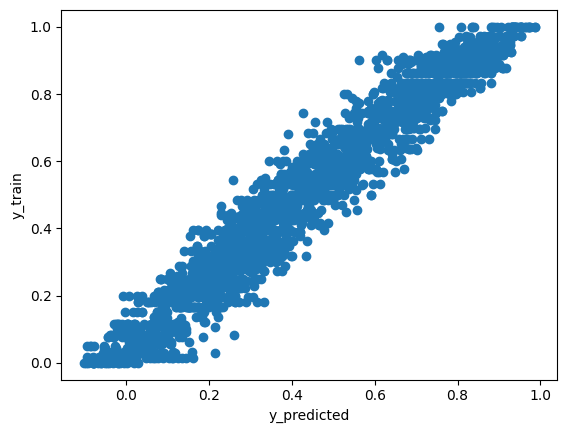

In [ ]:
plt.scatter(np.squeeze(output_train),y_train)
plt.xlabel('y_predicted')
plt.ylabel('y_train')

Text(0, 0.5, 'y_test')

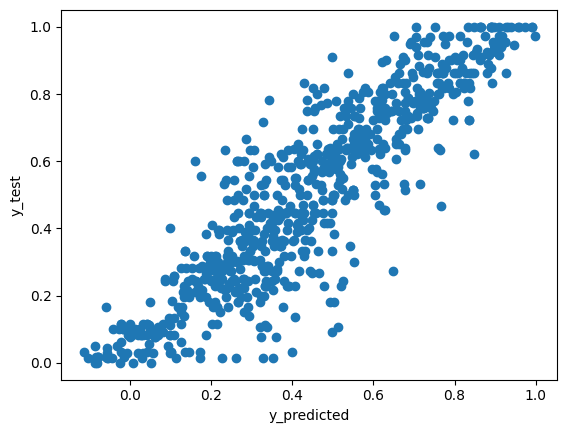

In [ ]:
plt.scatter(np.squeeze(output),y_test)
plt.xlabel('y_predicted')
plt.ylabel('y_test')

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)
print(f"{model.metrics_names[0]}: {scores[0]*100:.2f}")
print(f"{model.metrics_names[1]}: {scores[1]*100:.2f}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0182 - mean_squared_error: 0.0182
loss: 1.87
compile_metrics: 1.87


In [ ]:
r = np.corrcoef(np.squeeze(output_train), y_train)

In [ ]:
r

array([[1.        , 0.97003565],
       [0.97003565, 1.        ]])

In [ ]:
r_test = np.corrcoef(np.squeeze(output), y_test)
r_test

array([[1.        , 0.90134105],
       [0.90134105, 1.        ]])

In the paper, the Pearson correlation coefficient was 0.62 for linear regression. We manage to have a Pearson correlation coefficient of 0.90 with our CNN model.

##Save the model

In [ ]:
model.save('/content/drive/MyDrive/tohoku jype/CNN enthu/model/Enthusiasm_CNN_augmented_model.h5')

##Load model

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/tohoku jype/CNN enthu/model/Enthusiasm_CNN_augmented_model.h5')

#Part 2

## import

In [ ]:
!pip install audiomentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 11.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [ ]:
import glob
import fnmatch
import librosa
import os

from IPython.display import Audio
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

##Using the same sets as in the paper for independant singer

In [ ]:
search = '/content/drive/MyDrive/tohoku jype/CNN enthu/dataset/*.wav'

dataset_audio = []
dataset_files = []
for file in glob.glob(search, recursive=True):
  x, sr = librosa.load(file)
  dataset_files.append(os.path.basename(file))
  dataset_audio.append(x)

In [ ]:
metadata_path = '/content/drive/MyDrive/tohoku jype/CNN enthu/dataset/Evaluation.txt'
cols = ["filename", "enthusiasm"]
df = pd.read_csv(metadata_path, sep=" ", header=None, names=cols)

In [ ]:
X_audio = []
X_files = []
for k in range(len(df)):
  i = 0
  while dataset_files[i] != df['filename'][k]:
    i += 1
  X_audio.append(dataset_audio[i])
  X_files.append(dataset_files[i])

In [ ]:
Y = df['enthusiasm']

We use the audio files from the song Elly to train and the favorite songs for testing.

In [ ]:
X_train = []
X_train_files = []
X_favorite = []
X_favorite_files = []
y_train = []
y_favorite = []

for k in range(len(X_audio)):
  if '_e1_' in X_files[k] or '_e2_' in X_files[k] or '_e3_' in X_files[k] or '_e4_' in X_files[k]:
    X_train.append(X_audio[k])
    X_train_files.append(X_files[k])
    y_train.append(Y[k])
  elif 'naka' in X_files[k] or 'kore' in X_files[k] or 'wara' in X_files[k] or 'saso' in X_files[k]:
    X_train.append(X_audio[k])
    X_train_files.append(X_files[k])
    y_train.append(Y[k])
  else:
    X_favorite.append(X_audio[k])
    X_favorite_files.append(X_files[k])
    y_favorite.append(Y[k])

#X_train= np.array(X_train)
#X_favorite = np.array(X_favorite)
#y_train = np.array(y_train)
#y_favorite = np.array(y_favorite)

##Data Augmentations

In [ ]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift, Gain, PolarityInversion, ClippingDistortion, BandPassFilter, HighPassFilter, LowPassFilter, RoomSimulator

augment1 = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=1.0),
    PitchShift(min_semitones=-4, max_semitones=4, p=1.0)
])

augment2 = Compose([
    PitchShift(min_semitones=-5, max_semitones=5, p=1.0)
])

augment3 = Compose([
    TimeStretch(min_rate=0.8, max_rate=1.25, leave_length_unchanged=True, p=1.0),
    PitchShift(min_semitones=-4, max_semitones=4, p=1.0)
])

augment4 = Compose([
    Gain(min_gain_db=-5, max_gain_db=5, p=1.0),
    PitchShift(min_semitones=-4, max_semitones=4, p=1.0)
])

augment5 = Compose([
    PolarityInversion(p=1.0),
    PitchShift(min_semitones=-4, max_semitones=4, p=1.0)
])

augment6 = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=1.0),
    PitchShift(min_semitones=-4, max_semitones=4, p=1.0),
])

augment7 = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=1.0),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=1.0),
    PitchShift(min_semitones=-4, max_semitones=4, p=1.0),
    Shift(p=0.5),
])

augment8 = Compose([
    ClippingDistortion(min_percentile_threshold=0, max_percentile_threshold=30, p=1.0),
    PitchShift(min_semitones=-4, max_semitones=4, p=1.0)
])

augment9 = Compose([
    BandPassFilter(min_center_freq=200.0, max_center_freq=2000.0, p=1.0),
    PitchShift(min_semitones=-4, max_semitones=4, p=1.0)
])

augment10 = Compose([
    HighPassFilter(min_cutoff_freq=300.0, max_cutoff_freq=800.0, p=1.0),
    PitchShift(min_semitones=-4, max_semitones=4, p=1.0)
])

augment11 = Compose([
    LowPassFilter(min_cutoff_freq=200.0, max_cutoff_freq=2000.0, p=1.0),
    PitchShift(min_semitones=-4, max_semitones=4, p=1.0)
])

augment12 = Compose([
    RoomSimulator(p=1.0),
    PitchShift(min_semitones=-4, max_semitones=4, p=1.0)
])

In [ ]:
def audio_augmentation(dataset, augmentation):
  dataset_augmented = []
  for k in range(len(dataset)):
    dataset_augmented.append(augmentation(samples=dataset[k], sample_rate=sr))
  return dataset_augmented

In [ ]:
X_train_augment1 = audio_augmentation(X_train, augment1)
X_train_augment2 = audio_augmentation(X_train, augment2)
X_train_augment3 = audio_augmentation(X_train, augment3)
X_train_augment4 = audio_augmentation(X_train, augment4)
X_train_augment5 = audio_augmentation(X_train, augment5)
X_train_augment6 = audio_augmentation(X_train, augment6)
X_train_augment7 = audio_augmentation(X_train, augment7)
X_train_augment8 = audio_augmentation(X_train, augment8)
X_train_augment9 = audio_augmentation(X_train, augment9)
X_train_augment10 = audio_augmentation(X_train, augment10)
X_train_augment11 = audio_augmentation(X_train, augment11)
#X_train_augment12 = audio_augmentation(X_train, augment12)

In [ ]:
X_train_augmented = X_train + X_train_augment1 + X_train_augment2 + X_train_augment3 + X_train_augment4 + X_train_augment5 + X_train_augment6 + X_train_augment7 + X_train_augment8 + X_train_augment9 + X_train_augment10 + X_train_augment11 #+ X_train_augment12

In [ ]:
Y_train_augmented = np.concatenate((y_train, y_train, y_train, y_train, y_train, y_train, y_train, y_train, y_train, y_train, y_train, y_train))# y_train, y_train, y_train

In [ ]:
print(len(X_train_augmented))

3648


##Resize

In [ ]:
def resizeLength(dataset):
  #maxLength = len(max(dataset, key=len))
  length = sr * 5 # 5 seconds
  data_resized = []
  for k in range(len(dataset)):
    if len(dataset[k]) < length:
      padded_element = np.pad(dataset[k], (0, length - len(dataset[k])))
      data_resized.append(padded_element)
    else:
      truncated_element = dataset[k][:length]
      data_resized.append(truncated_element)
  return np.array(data_resized)

In [ ]:
X_train = resizeLength(X_train_augmented)

In [ ]:
X_favorite = resizeLength(X_favorite)

##Mel-spectrogram

In [ ]:
import numpy as np

def melspectrogram(dataset, sr):
  list_mel = []
  for k in range(len(dataset)):
    S = librosa.feature.melspectrogram(y = dataset[k], sr = sr, n_fft=2048, hop_length=512 )
    #S_dB = librosa.power_to_db(S, ref=np.max)
    S_dB = librosa.power_to_db(S, ref=1.0)
    list_mel.append(S_dB.reshape((128, 216, 1)))#(S_dB.reshape((128, 71, 1)))
  return list_mel

In [ ]:
X_melspectrogram = melspectrogram(X_train, sr)

In [ ]:
X = np.array(X_melspectrogram)

In [ ]:
X_test_melspectrogram = melspectrogram(X_favorite, sr)

In [ ]:
X_test = np.array(X_test_melspectrogram)

##Save spectrogram

In [ ]:
np.savez('/content/drive/MyDrive/tohoku jype/CNN enthu/dataset/Enthusiasm_data_spectrogram_independant', inputs_train=X, targets_train=Y_train_augmented, inputs_test = X_test, targets_test=y_favorite)

##Load spectrogram

In [ ]:
data = np.load('/content/drive/MyDrive/tohoku jype/CNN enthu/dataset/Enthusiasm_data_spectrogram_independant.npz')

In [ ]:
X_train = data['inputs_train']
Y_train = data['targets_train']
X_test = data['inputs_test']
Y_test = data['targets_test']

##Normalize

In [ ]:
Y_test = (Y_test - Y_train.min()) / (Y_train.max() - Y_train.min())

In [ ]:
Y_train = (Y_train - Y_train.min()) / (Y_train.max() - Y_train.min())

In [ ]:
X_test = (X_test - X_train.min()) / (X_train.max() - X_train.min())

In [ ]:
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())

##Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size = 0.5, random_state=42, shuffle=True)

##CNN implementation

In [ ]:
y_train.shape

(1824,)

In [ ]:
X_train.shape

(1824, 128, 216, 1)

In [ ]:
input_shape = (128, 216, 1)

In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, InputLayer, MaxPooling2D, Flatten, BatchNormalization, Dropout

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(128, 3, activation = 'relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(256, 3, activation = 'relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(512, 3, activation = 'relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation="linear"))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 216, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 216, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 108, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 108, 128)        │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 108, 128)        │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 54, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 54, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 27, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 27, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 27, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 13, 512)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 13, 512)          │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 53248)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │     109,053,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 111,725,057 (426.20 MB)

 Trainable params: 111,721,857 (426.19 MB)

 Non-trainable params: 3,200 (12.50 KB)

In [ ]:
from keras import metrics
optimizer = keras.optimizers.SGD(learning_rate=0.5)
opt = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=[metrics.MeanSquaredError()])
callback = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=10, restore_best_weights=True)

In [ ]:
history2 = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=32, epochs=100, callbacks=[callback])

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 28s 195ms/step - loss: 2.1844 - mean_squared_error: 2.1844 - val_loss: 0.0909 - val_mean_squared_error: 0.0909
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 0.7147 - mean_squared_error: 0.7147 - val_loss: 0.9939 - val_mean_squared_error: 0.9939
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 0.5571 - mean_squared_error: 0.5571 - val_loss: 0.7588 - val_mean_squared_error: 0.7588
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 0.4395 - mean_squared_error: 0.4395 - val_loss: 0.1240 - val_mean_squared_error: 0.1240
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 0.3841 - mean_squared_error: 0.3841 - val_loss: 0.2823 - val_mean_squared_error: 0.2823
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 0.3341 - mean_squared_error: 0.3341 - val_loss: 0.0838 - val_mean_squared_error: 0.0838
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 0.2841 - mean_squared_error: 0.2841 - val_lo

Minimum validation loss: 0.014377940446138382


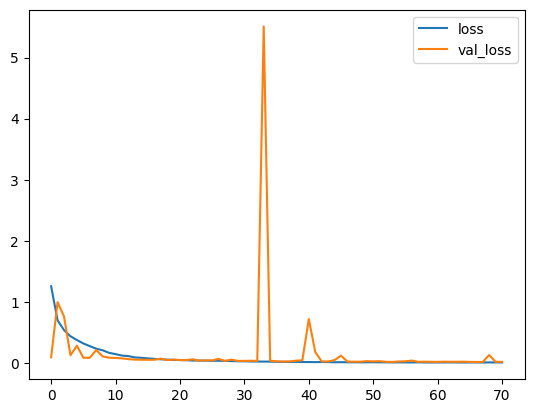

In [ ]:
history_df = pd.DataFrame(history2.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
output = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 402ms/step


Text(0, 0.5, 'y_test')

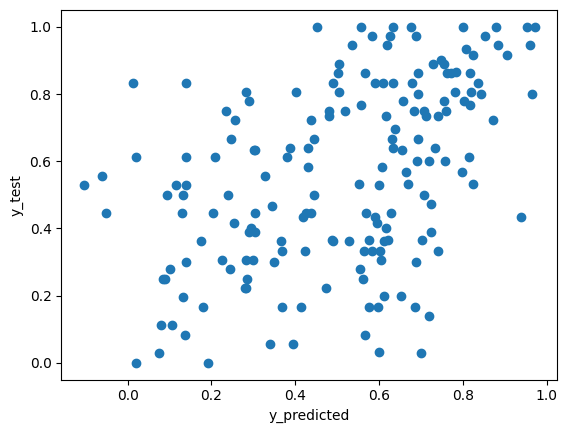

In [ ]:
plt.scatter(np.squeeze(output),Y_test)
plt.xlabel('y_predicted')
plt.ylabel('y_test')

In [ ]:
r_test = np.corrcoef(np.squeeze(output), Y_test)
r_test

array([[1.        , 0.45939489],
       [0.45939489, 1.        ]])